In [27]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

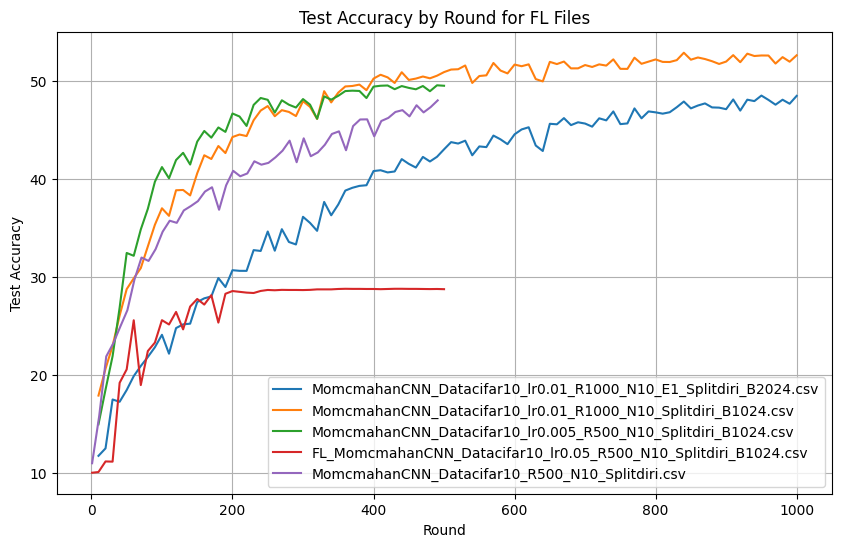

In [43]:
def process_csv_files(directory):
    plt.figure(figsize=(10, 6))
    
    # 폴더 내의 모든 CSV 파일을 처리
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            
            # Client가 'server'인 경우와 아닌 경우를 구분
            if 'Client' in df.columns and 'server' in df['Client'].values:
                df_server = df[df['Client'] == 'server'][['Round', 'TestAcc']]
                df_server = df_server.sort_values(by='Round')
                plt.plot(df_server['Round'], df_server['TestAcc'], label=f'{filename} - server')
            else:
                df_filtered = df[df['Client'] != 'server']
                df_grouped = df_filtered.groupby('Round')['TestAcc'].mean().reset_index()
                df_grouped = df_grouped.sort_values(by='Round')
                plt.plot(df_grouped['Round'], df_grouped['TestAcc'], label=filename)
    
    plt.title('Test Accuracy by Round for FL Files')
    plt.xlabel('Round')
    plt.ylabel('Test Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# CSV 파일들이 저장된 디렉토리 경로를 지정
directory = './csv_results/lenet_test'
process_csv_files(directory)

AttributeError: 'NoneType' object has no attribute 'group'

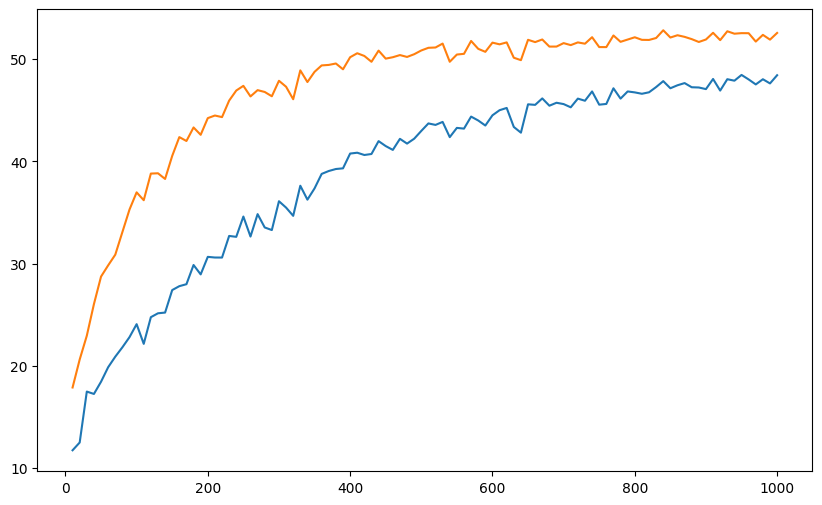

In [44]:
lenet = './csv_results/lenet_test'
plt.figure(figsize=(10, 6))

for filename in os.listdir(lenet):
    if filename.endswith('.csv'):
        file_path = os.path.join(lenet, filename)
        df = pd.read_csv(file_path)
        lr_value = (re.search(r'B(\d+(\.\d+)?)(?=)', filename)).group(1)
        if 'FL' and 'R500' not in filename:
            df_grouped = df.groupby('Round')['TestAcc'].mean().reset_index()
            df_grouped = df_grouped.sort_values(by='Round')
            plt.plot(df_grouped['Round'], df_grouped['TestAcc'], label=f'lr {lr_value}')
            

plt.title('Mean Test Accuracy(10 Client)')
plt.xlabel('Round')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.xlim(0, 1000)
plt.ylim(0, 100)

plt.show()

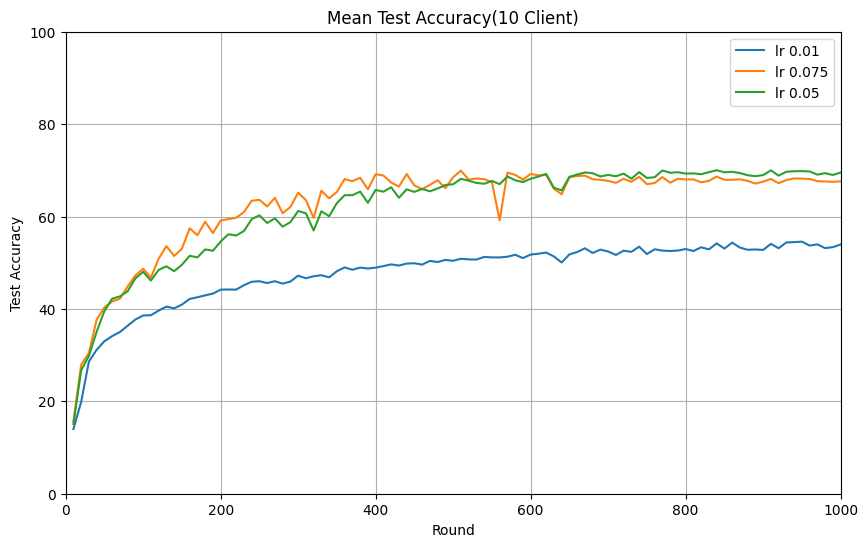

In [32]:
resnet18 = './csv_results/resnet18_test'

plt.figure(figsize=(10, 6))

for filename in os.listdir(resnet18):
    if filename.endswith('.csv'):
        file_path = os.path.join(resnet18, filename)
        df = pd.read_csv(file_path)
        lr_value = (re.search(r'lr(\d+(\.\d+)?)(?=_)', filename)).group(1)
        if 'FL' not in filename:
            df_grouped = df.groupby('Round')['TestAcc'].mean().reset_index()
            df_grouped = df_grouped.sort_values(by='Round')
            plt.plot(df_grouped['Round'], df_grouped['TestAcc'], label=f'lr {lr_value}')

plt.title('Mean Test Accuracy(10 Client)')
plt.xlabel('Round')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.xlim(0, 1000)
plt.ylim(0, 100)

plt.show()


In [72]:
### ===== CIFAR10 Test ======
## Client: 10
## Batch Size: 1024
## Avg Method: n_data
## 

# ===== diri Test =====
# Model: Lenet(mcmahanCNN)
# 변인1: Batch(512, 1024, 2048)
# 변인2: Learning Rate(0.01, 0.05, 0.075)
#TODO: 실험 3개(B512, Lr0.05, 0.075)
FL_lenet_lr005_B1024='/home/gang/dfl/csv_results/lenet_test/FL_MomcmahanCNN_Datacifar10_lr0.05_R500_N10_Splitdiri_B1024.csv'

lenet_lr0005_B1024='/home/gang/dfl/csv_results/lenet_test/MomcmahanCNN_Datacifar10_lr0.005_R500_N10_Splitdiri_B1024.csv'
lenet_lr001_B1024='/home/gang/dfl/csv_results/lenet_test/MomcmahanCNN_Datacifar10_lr0.01_R1000_N10_Splitdiri_B1024.csv'
lenet_lr005_B1024=''
lenet_lr0075_B1024=''

lenet_lr001_B512=''
lenet_lr001_B2024='/home/gang/dfl/csv_results/lenet_test/MomcmahanCNN_Datacifar10_lr0.01_R1000_N10_E1_Splitdiri_B2024.csv'

lenet_batch_u10=[lenet_lr001_B512, lenet_lr001_B1024, lenet_lr001_B2024]
lenet_lr_u10=[lenet_lr0005_B1024, lenet_lr001_B1024, lenet_lr005_B1024, lenet_lr0075_B1024]

# Model: ResNet18
# 변인1: Batch(512, 1024, 2048)
# 변인2: Learning Rate(0.01, 0.05, 0.075)
#TODO: 실험 2개(B512, B2048)
FL_resnet18_lr005_B256='/home/gang/dfl/csv_results/resnet18_test/FL_Moresnet18_Datacifar10_lr0.05_R1000_N10_Splitdiri_B256.csv'
resnet18_lr001_B1024='/home/gang/dfl/csv_results/resnet18_test/Moresnet18_Datacifar10_lr0.01_R1000_N10_Splitdiri_B1024.csv'
resnet18_lr005_B1024='/home/gang/dfl/csv_results/resnet18_test/Moresnet18_Datacifar10_lr0.05_R1000_N10_Splitdiri_B1024.csv'
resnet18_lr0075_B1024='/home/gang/dfl/csv_results/resnet18_test/Moresnet18_Datacifar10_lr0.075_R1000_N10_Splitdiri_B1024.csv'

resnet18_lr0075_B512=''
resnet18_lr0075_B2048=''

resnet18_batch_u10=[resnet18_lr0075_B512, resnet18_lr0075_B1024, resnet18_lr0075_B2048]
resnet18_lr_u10=[resnet18_lr001_B1024, resnet18_lr005_B1024, resnet18_lr0075_B1024]

#non iid Test

#iid Test





In [73]:
def generate_figure(test_set, test_type, n_client):
    for file_path in test_set:
        df = pd.read_csv(file_path)
        if test_type == 'lr':
            legend = (re.search(r'lr(\d+(\.\d+)?)(?=_)', file_path)).group(1)
        elif test_type == 'Batch':
            legend = (re.search(r'B(\d+(\.\d+)?)(?=)', file_path)).group(1)
        df_grouped = df.groupby('Round')['TestAcc'].mean().reset_index()
        df_grouped = df_grouped.sort_values(by='Round')
        plt.plot(df_grouped['Round'], df_grouped['TestAcc'], label=f'{test_type} {legend}')

    plt.title(f'Mean Test Accuracy({n_client} Client)')
    plt.xlabel('Round')
    plt.ylabel('Test Accuracy')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 1000)
    plt.ylim(0, 100)

    plt.show()

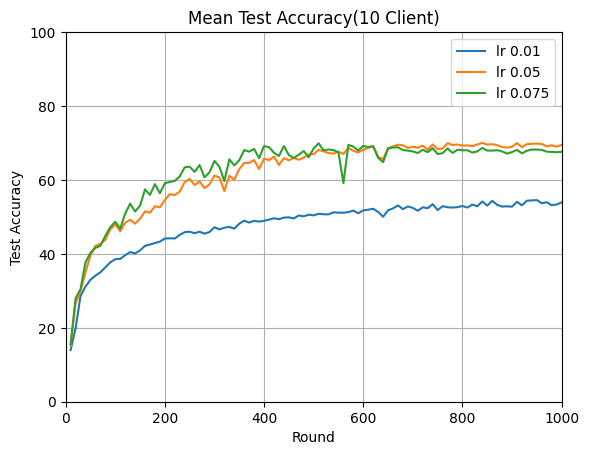

In [74]:
generate_figure(resnet18_lr_u10, 'lr', 10)